In [37]:
# Imports
import pandas as pd
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, savefig, show, subplots
from numpy import ndarray
from pandas import Series
from seaborn import heatmap

from dslabs_functions import (
    HEIGHT,
    count_outliers,
    define_grid,
    get_variable_types,
    plot_bar_chart,
    plot_multibar_chart,
    set_chart_labels,
    plot_multi_scatters_chart
)

In [38]:
# Read
filename = 'class_pos_covid.csv'
file_tag = 'covid_fig_'
data = pd.read_csv(filename, sep=',', decimal='.', na_values='')

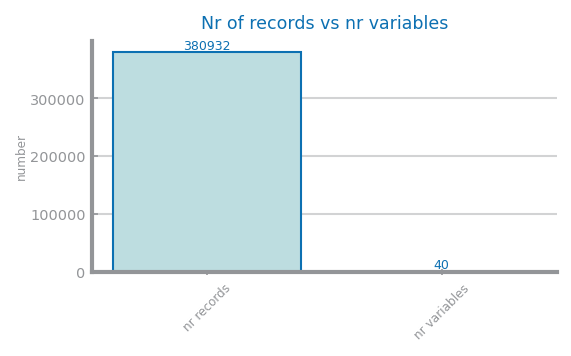

In [39]:
# nr records vs nr variables
figure(figsize=(4, 2))
values: dict[str, int] = {
    "nr records": data.shape[0], "nr variables": data.shape[1]}

plot_bar_chart(
    list(values.keys()),
    list(values.values()),
    title="Nr of records vs nr variables",
    ylabel="number",
)
savefig(f"images/{file_tag}1_records_variables.png",    bbox_inches='tight')
show()

{'numeric': ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI'], 'binary': ['Sex', 'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos'], 'date': [], 'symbolic': ['State', 'GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'TetanusLast10Tdap']}


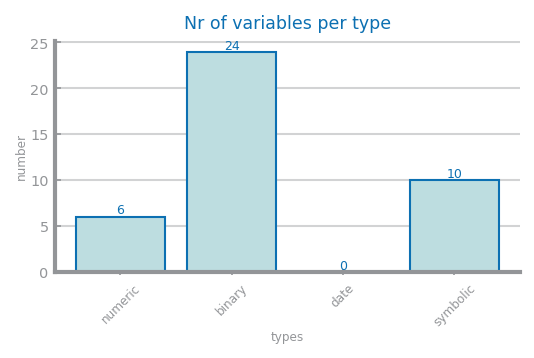

In [40]:
# nr of variables per type
variable_types: dict[str, list] = get_variable_types(data)
print(variable_types)

counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), 
    list(counts.values()),
    title="Nr of variables per type",
    xlabel="types",
    ylabel="number"
)
savefig(f"images/{file_tag}2_variable_types.png",bbox_inches='tight')
show()

In [41]:
symbolic: list[str] = variable_types["symbolic"]
data[symbolic] = data[symbolic].apply(lambda x: x.astype("category"))

data.dtypes

State                        category
Sex                            object
GeneralHealth                category
PhysicalHealthDays            float64
MentalHealthDays              float64
LastCheckupTime              category
PhysicalActivities             object
SleepHours                    float64
RemovedTeeth                 category
HadHeartAttack                 object
HadAngina                      object
HadStroke                      object
HadAsthma                      object
HadSkinCancer                  object
HadCOPD                        object
HadDepressiveDisorder          object
HadKidneyDisease               object
HadArthritis                   object
HadDiabetes                  category
DeafOrHardOfHearing            object
BlindOrVisionDifficulty        object
DifficultyConcentrating        object
DifficultyWalking              object
DifficultyDressingBathing      object
DifficultyErrands              object
SmokerStatus                 category
ECigaretteUs

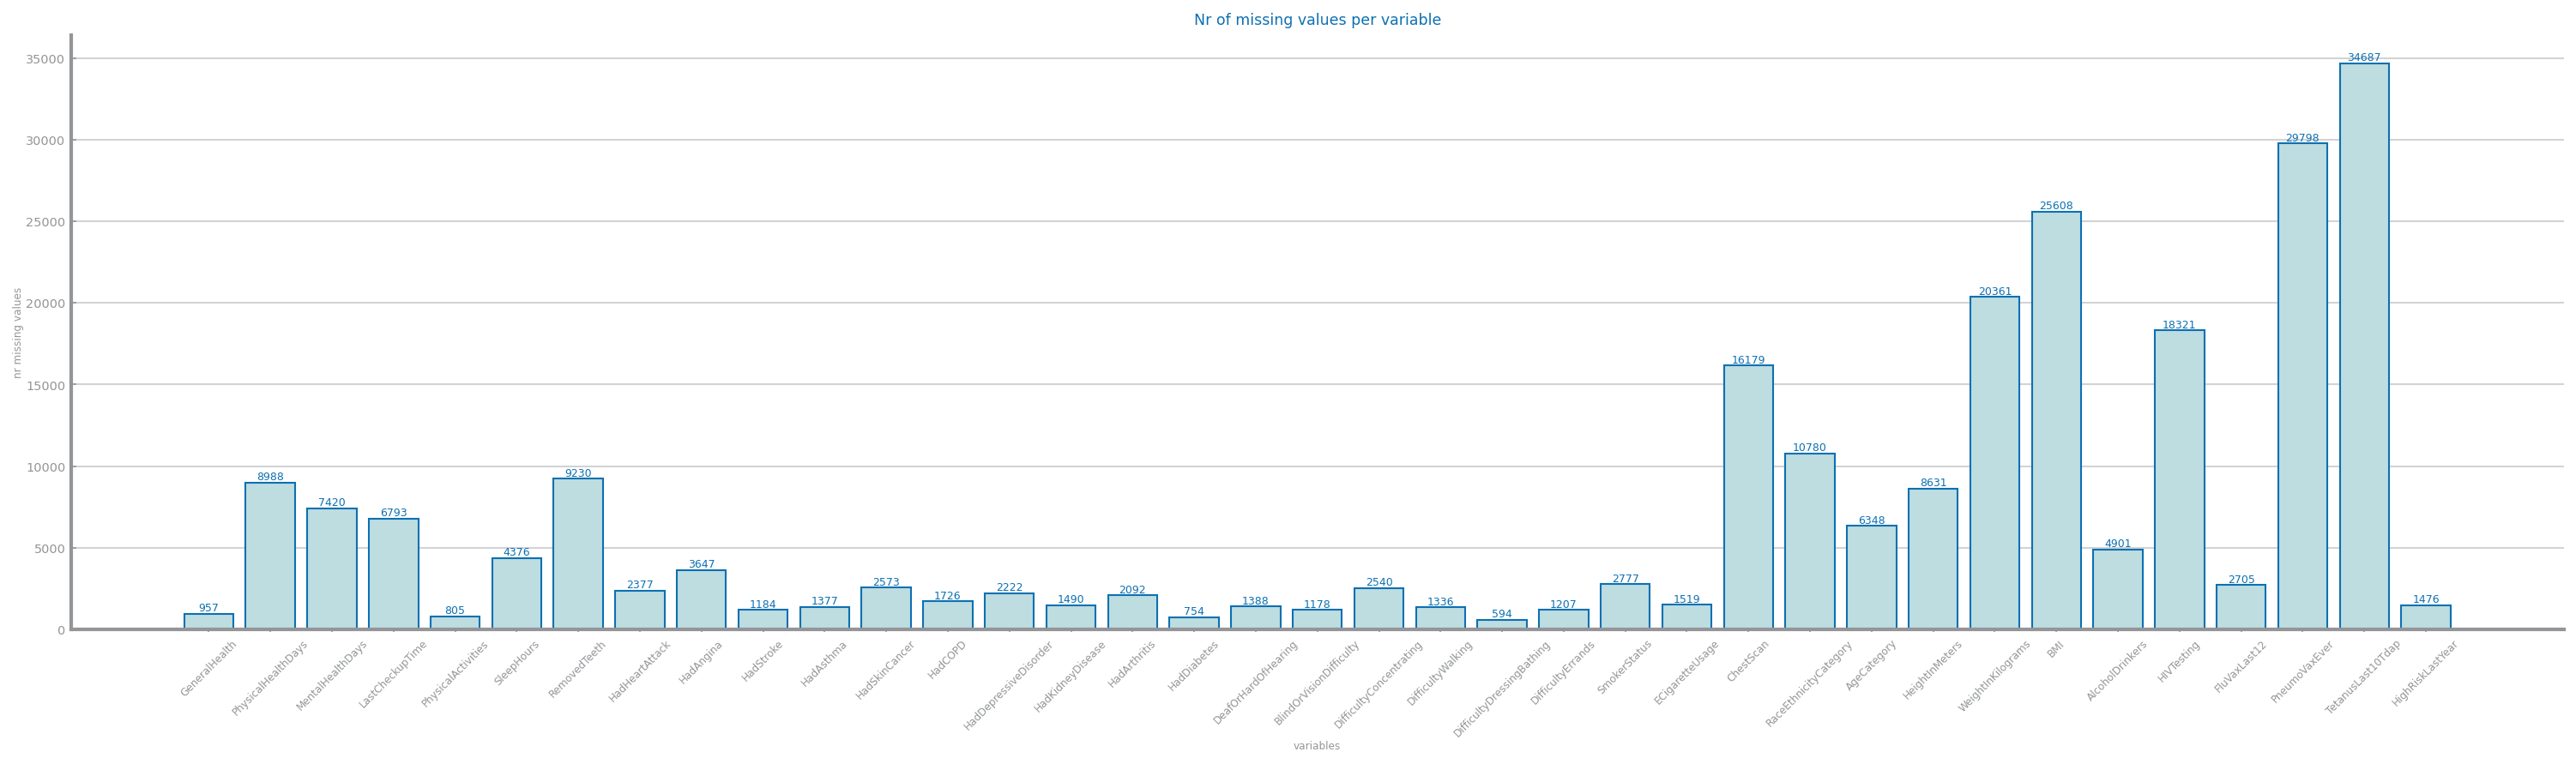

In [42]:
# nr of missing values per variable

mv: dict[str, int] = {}
for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure(figsize=(25, 6))
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values"
)
savefig(f"images/{file_tag}3_mv.png",bbox_inches='tight')
show()


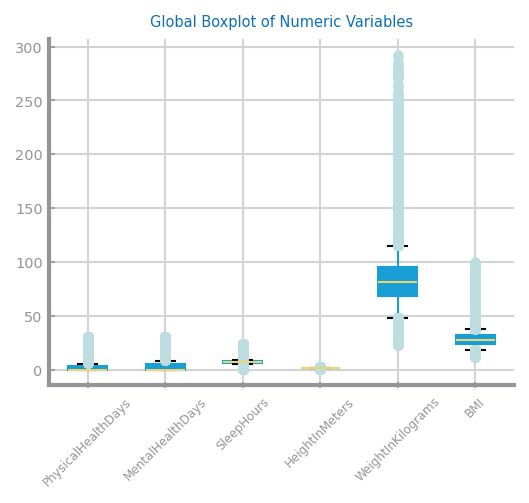

In [43]:
import matplotlib.pyplot as plt

variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
if [] != numeric:
    # Create the boxplot
    data[numeric].boxplot(rot=45)
    plt.title('Global Boxplot of Numeric Variables', fontsize=7)
    savefig(f"images/{file_tag}4_global_boxplot.png", bbox_inches='tight')
    plt.show()
else:
    print("There are no numeric variables.")


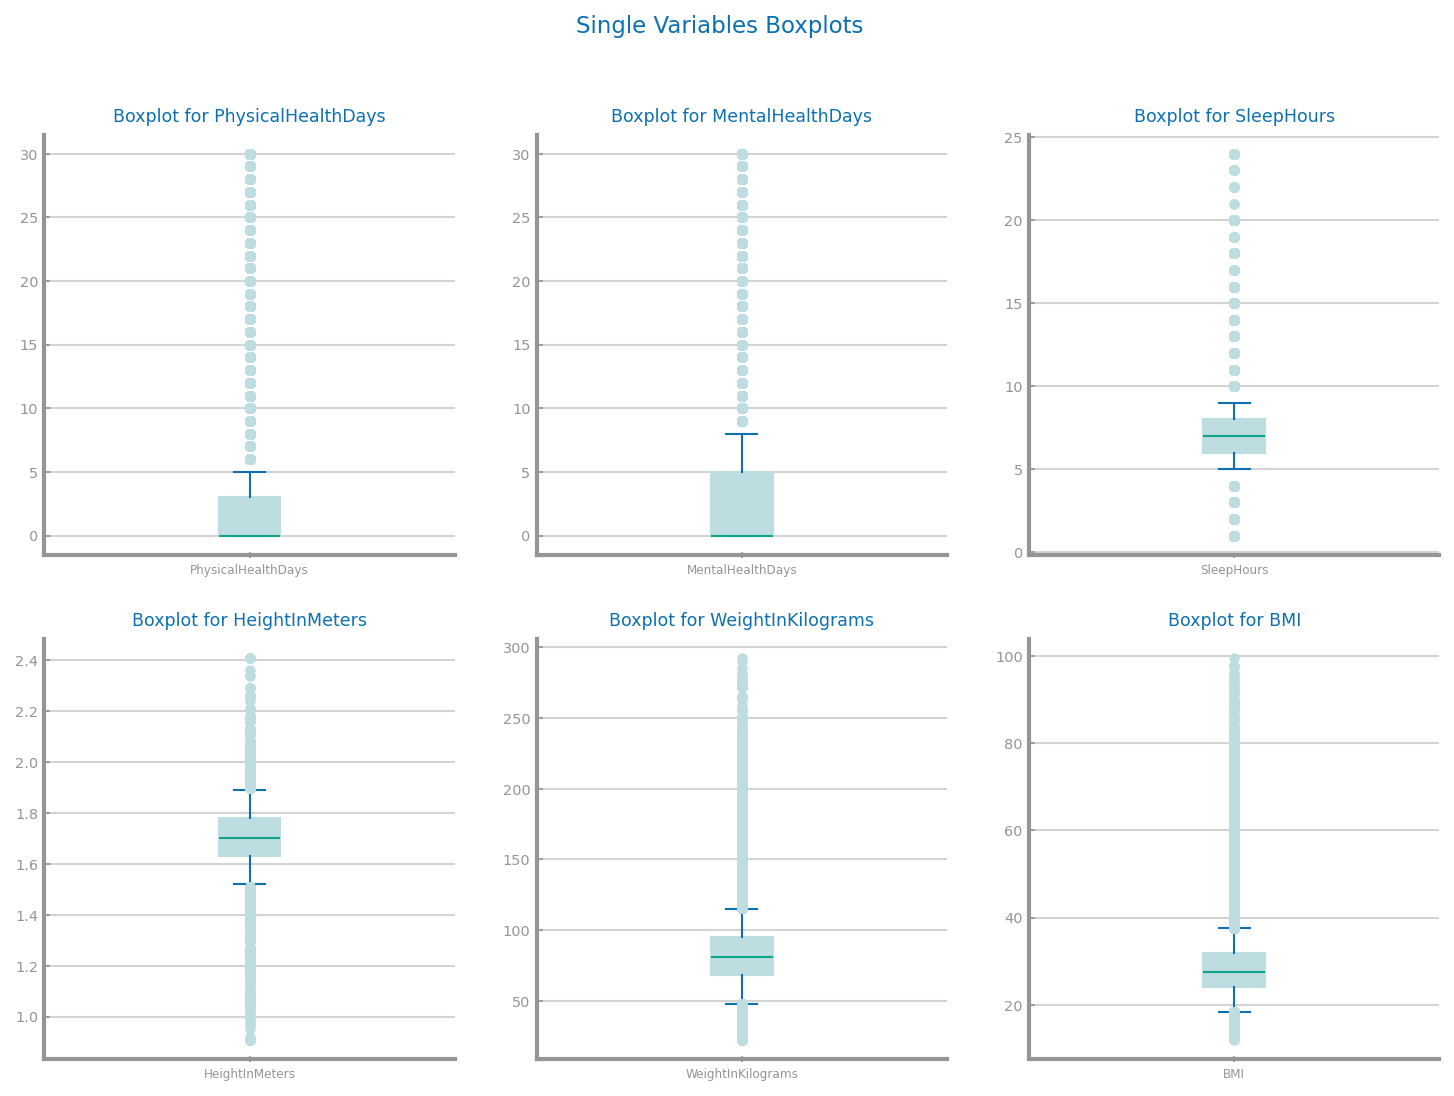

In [44]:
# single variables boxplots

numeric: list[str] = variable_types["numeric"]

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    plt.suptitle('Single Variables Boxplots', fontsize=11)

    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(data[numeric[n]].dropna().values)
        axs[i, j].set_xticklabels([numeric[n]])  # Set the label to the variable name
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

    plt.savefig(f"images/{file_tag}5_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

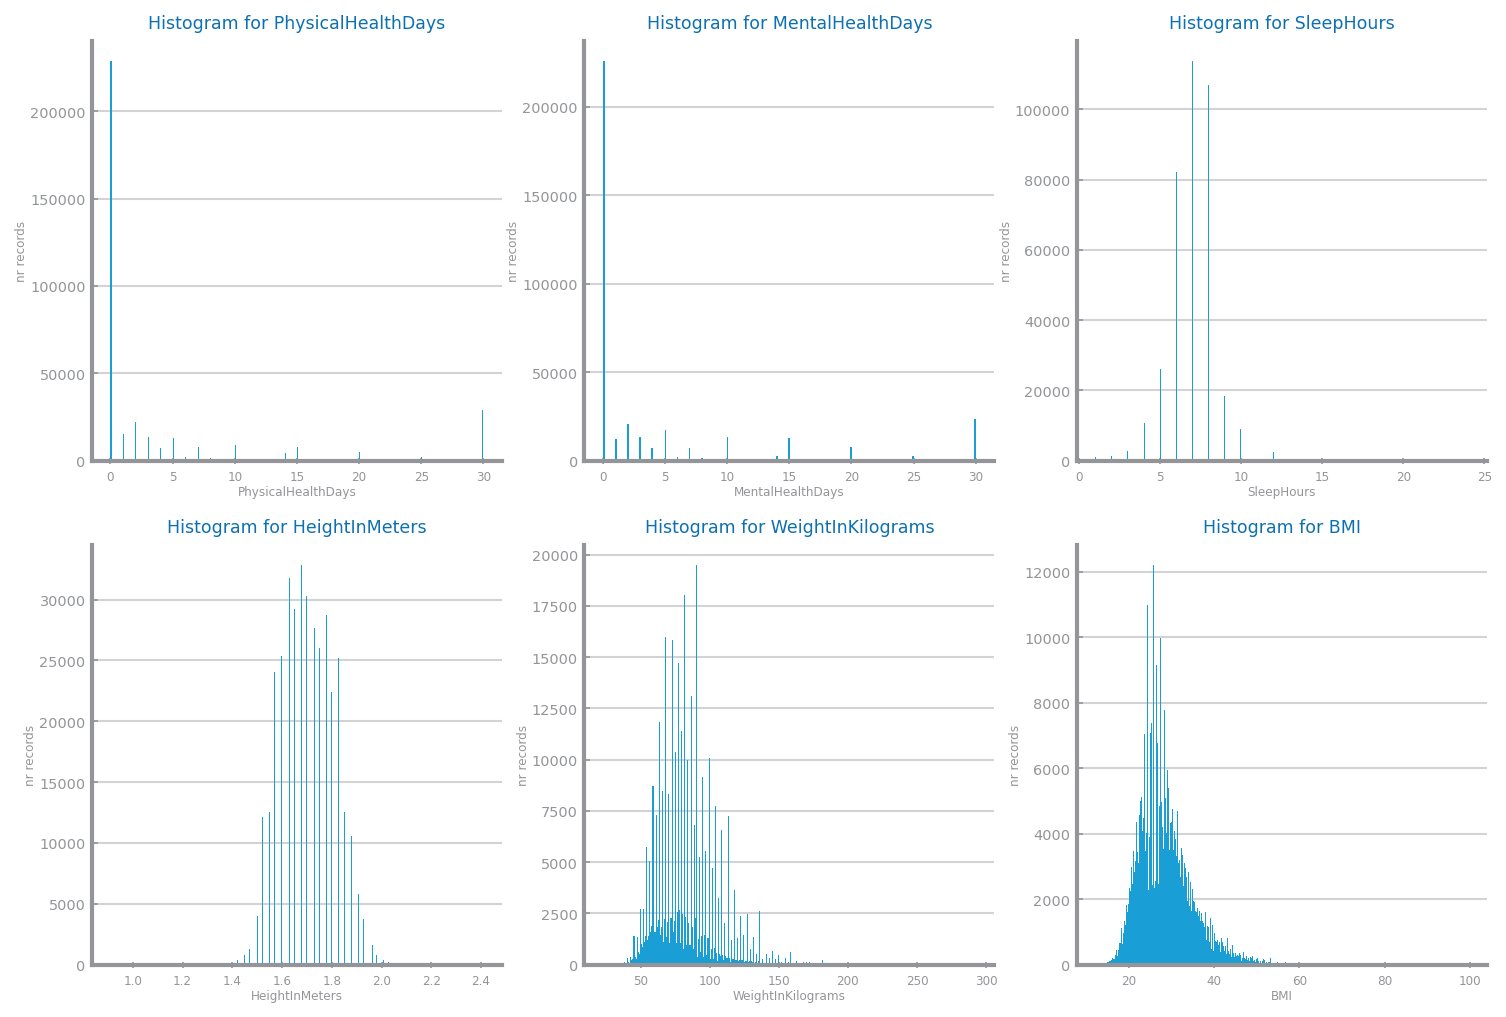

In [45]:
# Numeric Histograms

if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i: int
    j: int
    i, j = 0, 0
    for n in range(len(numeric)):
        set_chart_labels(
            axs[i, j],
            title=f"Histogram for {numeric[n]}",
            xlabel=numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(data[numeric[n]].dropna().values, "auto")
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}6_single_histograms_numeric.png")
    show()
else:
    print("There are no numeric variables.")

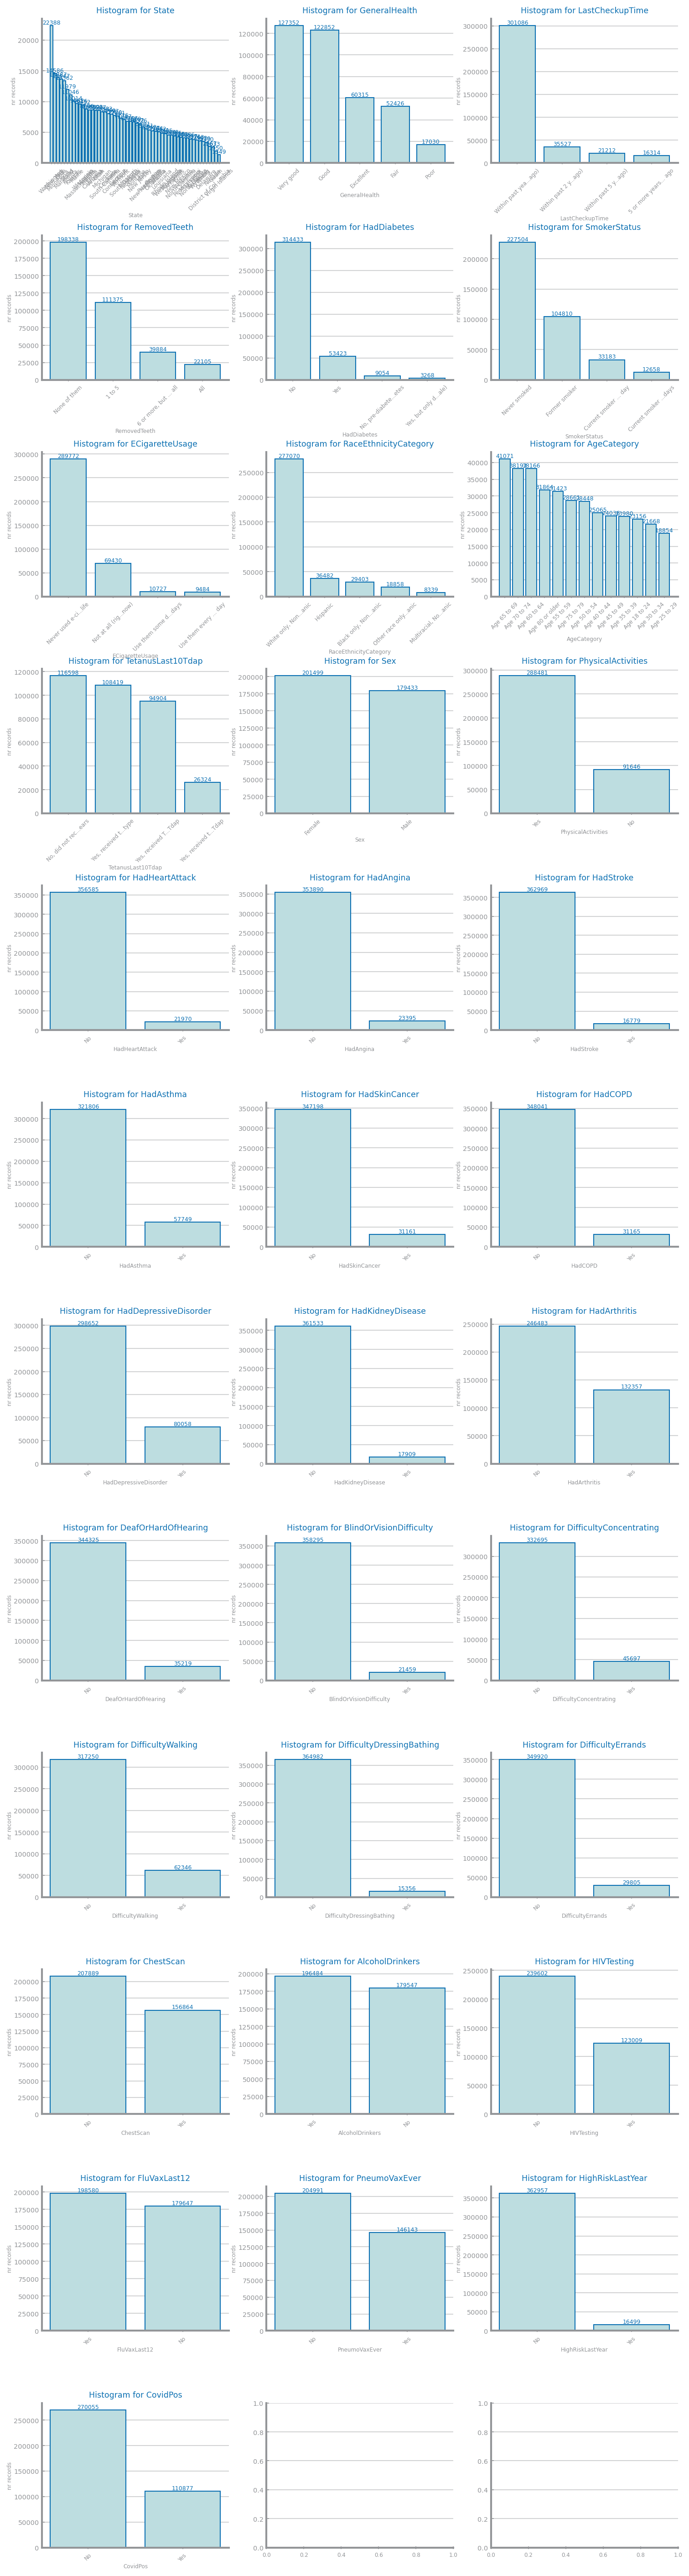

In [46]:
# Other Histograms
max_label_length = 15  # Define the maximum length for x-axis labels
symbolic: list[str] = variables_types["symbolic"] + variables_types["binary"]
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0

    plt.subplots_adjust(hspace=0.5)  # Adjust the value as needed for the space between rows

    for n in range(len(symbolic)):
        counts: Series = data[symbolic[n]].value_counts()
        
        # Truncate labels longer than max_label_length
        truncated_labels = [
            label[:max_label_length] + '...' + label[-4:] if len(label) > max_label_length else label
            for label in counts.index.to_list()
        ]
        
        plot_bar_chart(
            truncated_labels,
            counts.to_list(),
            ax=axs[i, j],
            title="Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

    savefig(f"images/{file_tag}6_histograms_symbolic.png", bbox_inches='tight')
    show()
else:
    print("There are no symbolic variables.")

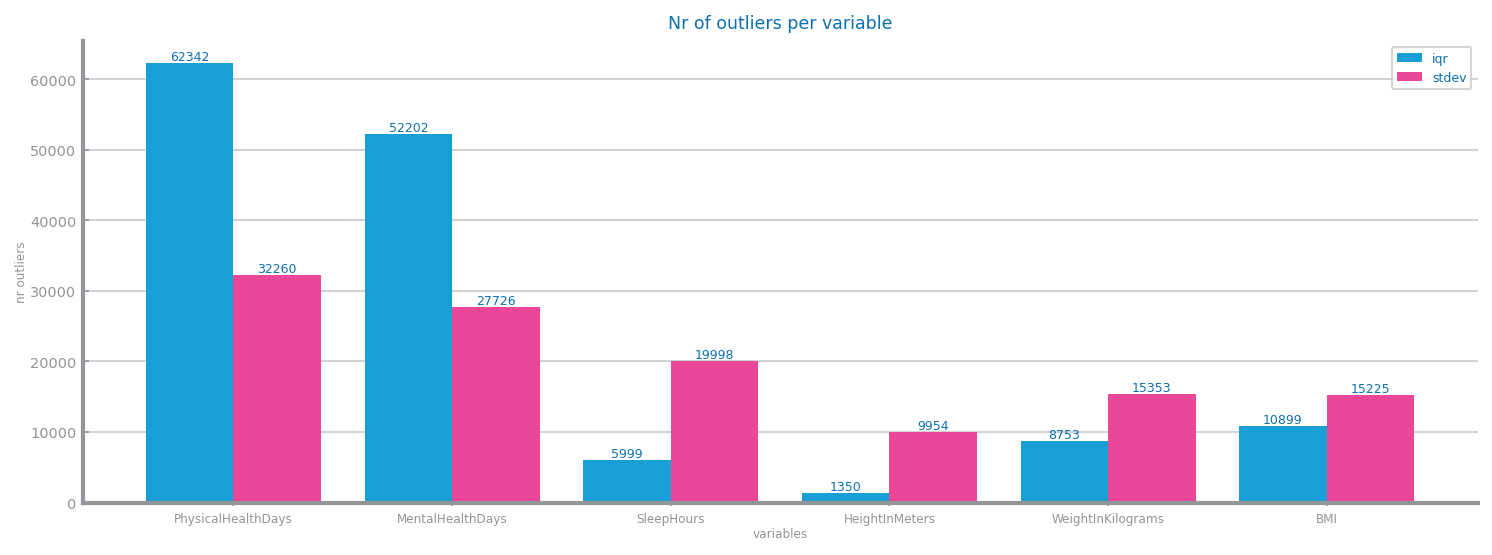

In [47]:
# Outliers study

if [] != numeric:
    outliers: dict[str, int] = count_outliers(data, numeric)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    savefig(f"images/{file_tag}9_outliers_standard.png")
    show()
else:
    print("There are no numeric variables.")

In [48]:
from dslabs_functions import determine_outlier_thresholds_for_var
some = data[numeric].describe()
outliers_stdev = []

for var in some:
    top, bottom = determine_outlier_thresholds_for_var(some[var], std_based=False, threshold=4)
    print(f"{var} - top: {top}, bottom: {bottom}")

    # count outliers per variable
    outliers_stdev += [some[some[var] > top].count()[var] + some[some[var] < bottom].count()[var]]


PhysicalHealthDays - top: 15.0, bottom: -12.0
MentalHealthDays - top: 25.0, bottom: -20.0
SleepHours - top: 16.0, bottom: -2.0
HeightInMeters - top: 2.380000000000001, bottom: 1.0299999999999994
WeightInKilograms - top: 204.08999999999997, bottom: -40.79999999999997
BMI - top: 62.64, bottom: -6.659999999999997


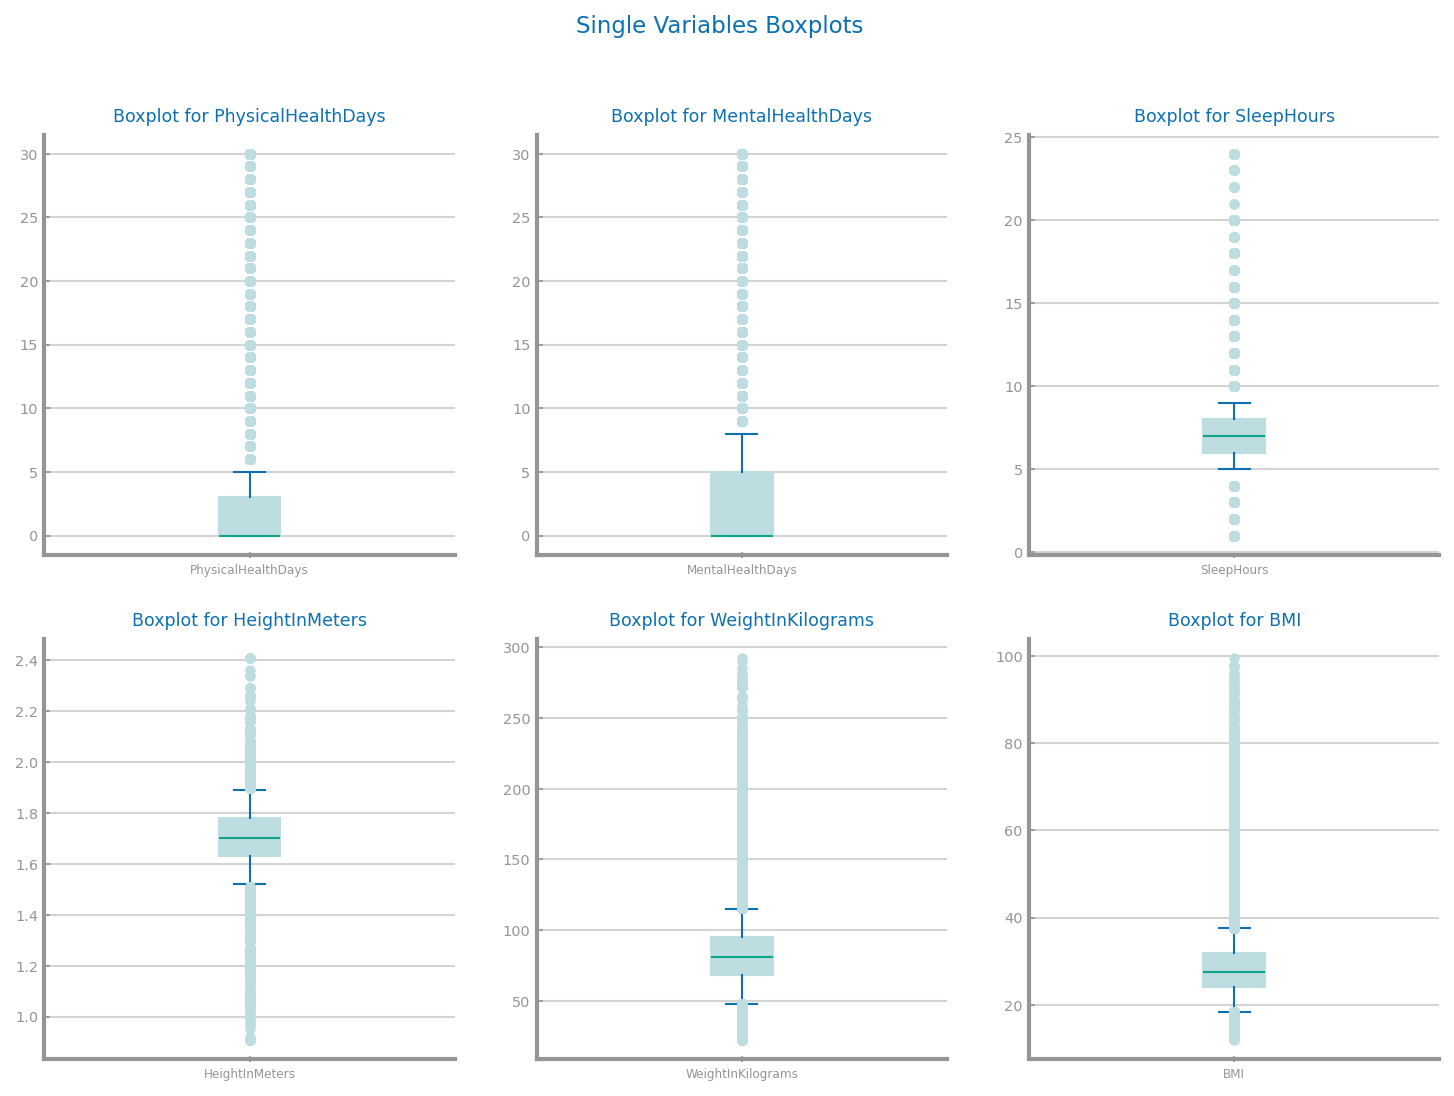

In [49]:
# single variables boxplots

numeric: list[str] = variable_types["numeric"]

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    plt.suptitle('Single Variables Boxplots', fontsize=11)

    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(data[numeric[n]].dropna().values)
        axs[i, j].set_xticklabels([numeric[n]])  # Set the label to the variable name
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

    plt.savefig(f"images/{file_tag}5_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

In [50]:
"""# Outliers study
# TODO melhorar
IQR = 4.5
STDEV = 4

if [] != numeric:
    outliers: dict[str, int] = count_outliers(data, numeric, nrstdev=STDEV, iqrfactor=IQR)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    savefig(f"images/{file_tag}9_outliers.png")
    show()
else:
    print("There are no numeric variables.")"""

'# Outliers study\n# TODO melhorar\nIQR = 4.5\nSTDEV = 4\n\nif [] != numeric:\n    outliers: dict[str, int] = count_outliers(data, numeric, nrstdev=STDEV, iqrfactor=IQR)\n    figure(figsize=(12, HEIGHT))\n    plot_multibar_chart(\n        numeric,\n        outliers,\n        title="Nr of outliers per variable",\n        xlabel="variables",\n        ylabel="nr outliers",\n        percentage=False,\n    )\n    savefig(f"images/{file_tag}9_outliers.png")\n    show()\nelse:\n    print("There are no numeric variables.")'

CovidPos
No     270055
Yes    110877
Name: count, dtype: int64


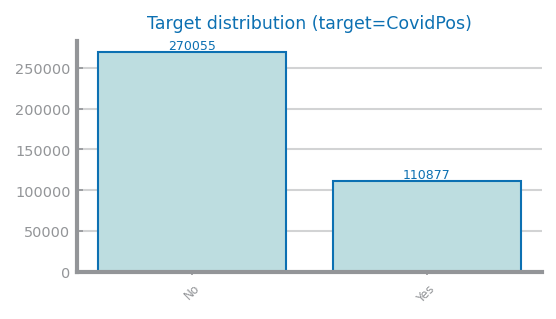

In [51]:
# Class distribution

target = "CovidPos"

values: Series = data[target].value_counts()
print(values)

figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
savefig(f"images/{file_tag}10_class_distribution.png")
show()

In [52]:
variables_types: dict[str, list] = get_variable_types(data)
print(variables_types["symbolic"])

['State', 'GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'TetanusLast10Tdap']


In [53]:
import pandas as pd
# Assuming 'data' is your DataFrame and 'AgeCategory' is the column name
pd.set_option('display.max_rows', None)  # Show all rows without truncation
unique_values = data["AgeCategory"].unique()
# display it as a DataFrame
pd.DataFrame(unique_values, columns=["AgeCategory"])

,AgeCategory
0,Age 80 or older
1,NaN
2,Age 40 to 44
3,Age 75 to 79
4,Age 70 to 74
5,Age 55 to 59
6,Age 65 to 69
7,Age 60 to 64
8,Age 50 to 54
9,Age 45 to 49


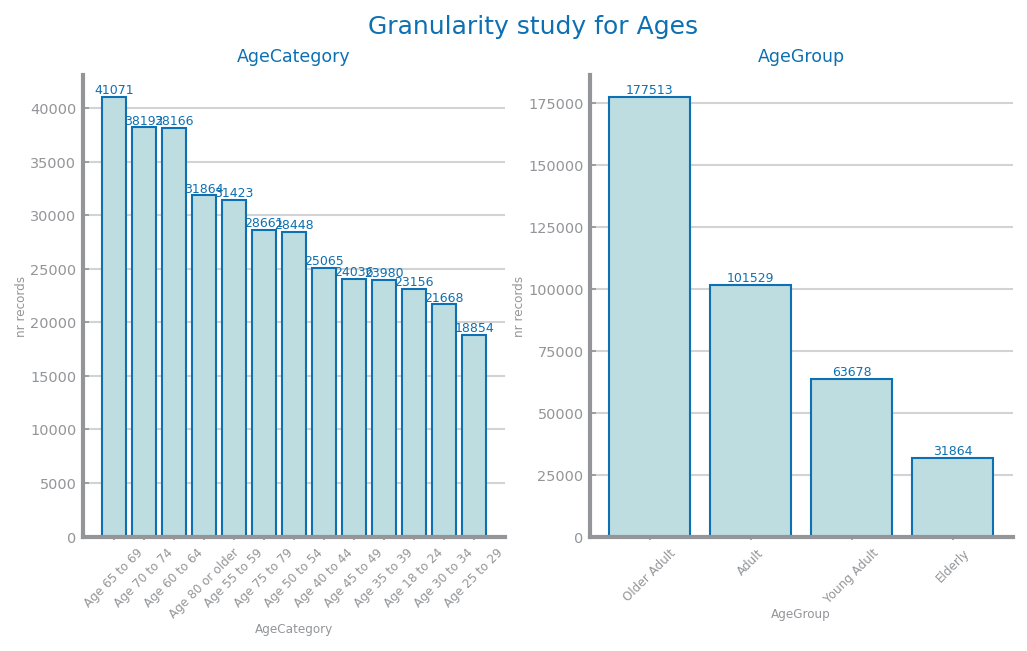

In [54]:
def analyse_property_granularity(
    data: pd.DataFrame, property: str, vars: list[str]
) -> ndarray:
    cols: int = len(vars)
    fig: Figure
    axs: ndarray
    fig, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"Granularity study for {property}")
    for i in range(cols):
        counts: Series[int] = data[vars[i]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=vars[i],
            xlabel=vars[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs

# Read
filename = 'class_pos_covid_derived.csv'
data_age_groups = pd.read_csv(filename, sep=',', decimal='.', na_values='')

symbolic: list[str] = variable_types["symbolic"]
data_age_groups[symbolic] = data_age_groups[symbolic].apply(lambda x: x.astype("category"))

property = "Ages" #TODO change this, it doesn't make sense
analyse_property_granularity(data_age_groups, property, ["AgeCategory", "AgeGroup"])
savefig(f"images/{file_tag}11_granularity_{property}.png", bbox_inches='tight')
show()

In [55]:
import pandas as pd
# Assuming 'data' is your DataFrame and 'AgeCategory' is the column name
unique_values = data["State"].unique()
# display it as a DataFrame
pd.DataFrame(unique_values, columns=["State"])

,State
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,District of Columbia
9,Florida


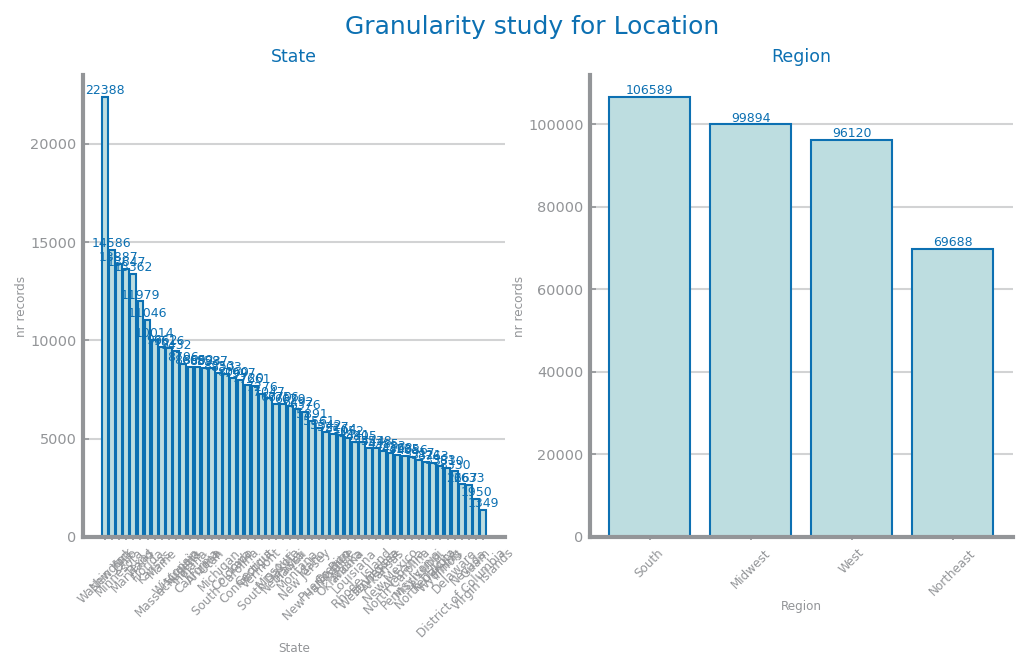

In [56]:
def analyse_property_granularity(
    data: pd.DataFrame, property: str, vars: list[str]
) -> ndarray:
    cols: int = len(vars)
    fig: Figure
    axs: ndarray
    fig, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"Granularity study for {property}")
    for i in range(cols):
        counts: Series[int] = data[vars[i]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=vars[i],
            xlabel=vars[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs

# Read
filename = 'class_pos_covid_derived.csv'
data_age_groups = pd.read_csv(filename, sep=',', decimal='.', na_values='')

symbolic: list[str] = variable_types["symbolic"]
data_age_groups[symbolic] = data_age_groups[symbolic].apply(lambda x: x.astype("category"))

property = "Location" #TODO change this, it doesn't make sense
analyse_property_granularity(data_age_groups, property, ["State", "Region"])
savefig(f"images/{file_tag}11_granularity_{property}.png", bbox_inches='tight')
show()

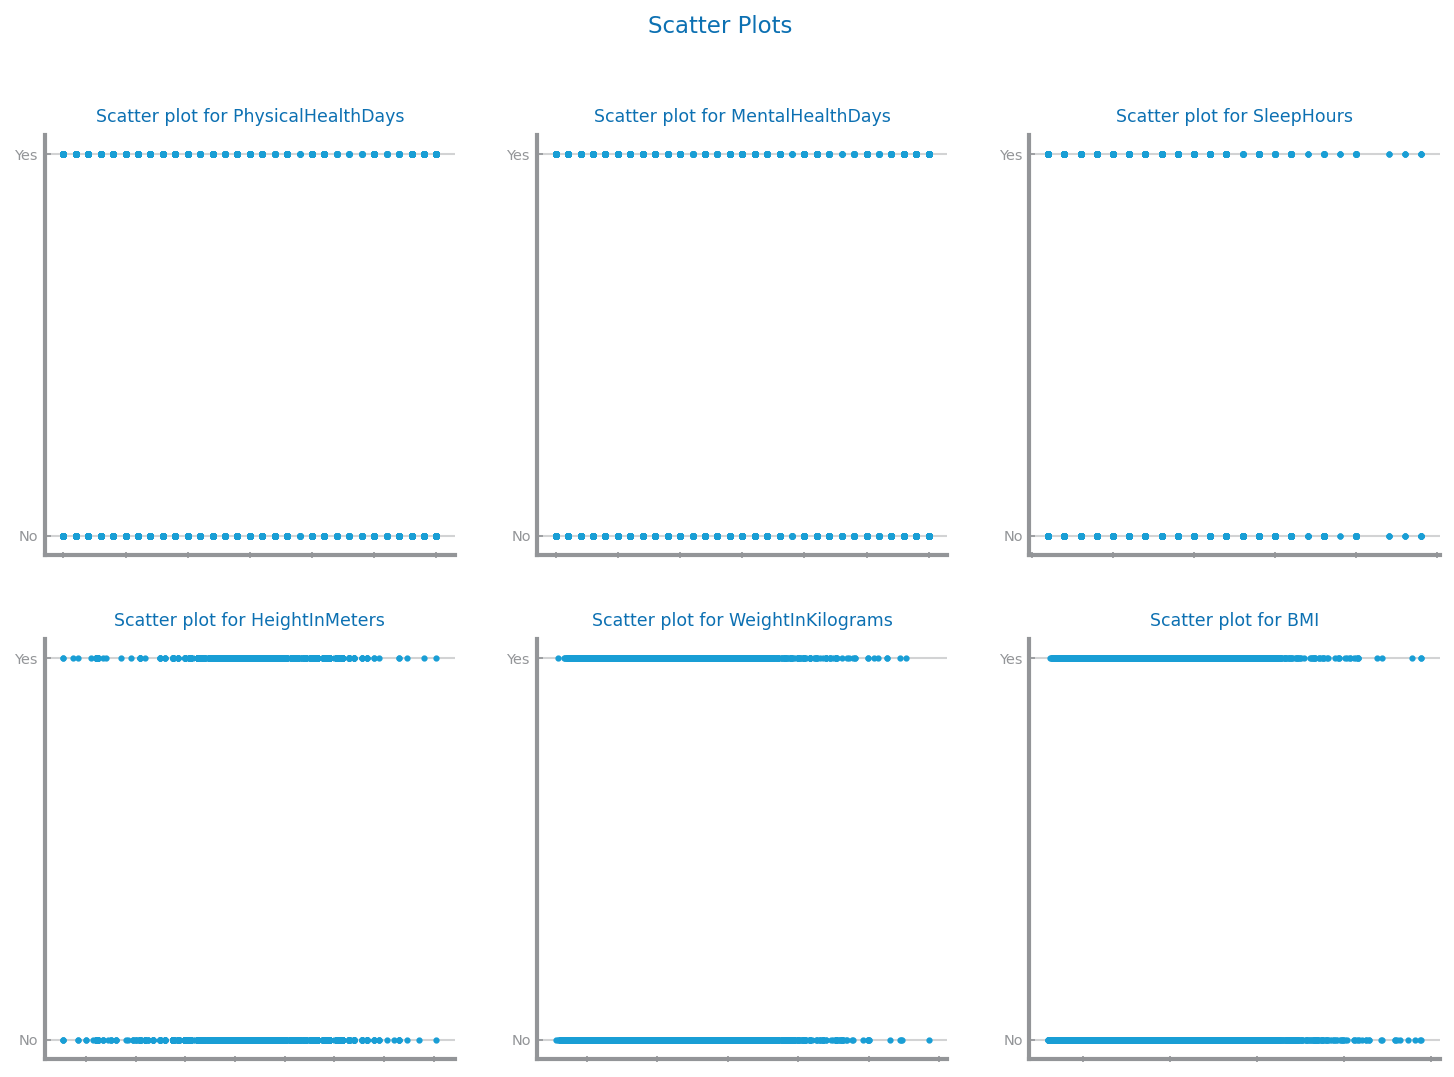

In [82]:
# Scatter plots for numeric variables vs target
data = data.dropna()

numeric: list[str] = variable_types["numeric"]

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    plt.suptitle('Scatter Plots', fontsize=11)

    for n in range(len(numeric)):
        axs[i, j].set_title("Scatter plot for %s" % numeric[n])
        axs[i, j].scatter(data[numeric[n]].dropna().values, data["CovidPos"].dropna().values)
        axs[i, j].set_xticklabels([numeric[n]])  # Set the label to the variable name
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

    plt.savefig(f"images/{file_tag}12_scatter_plots_vs_target.png")
    show()

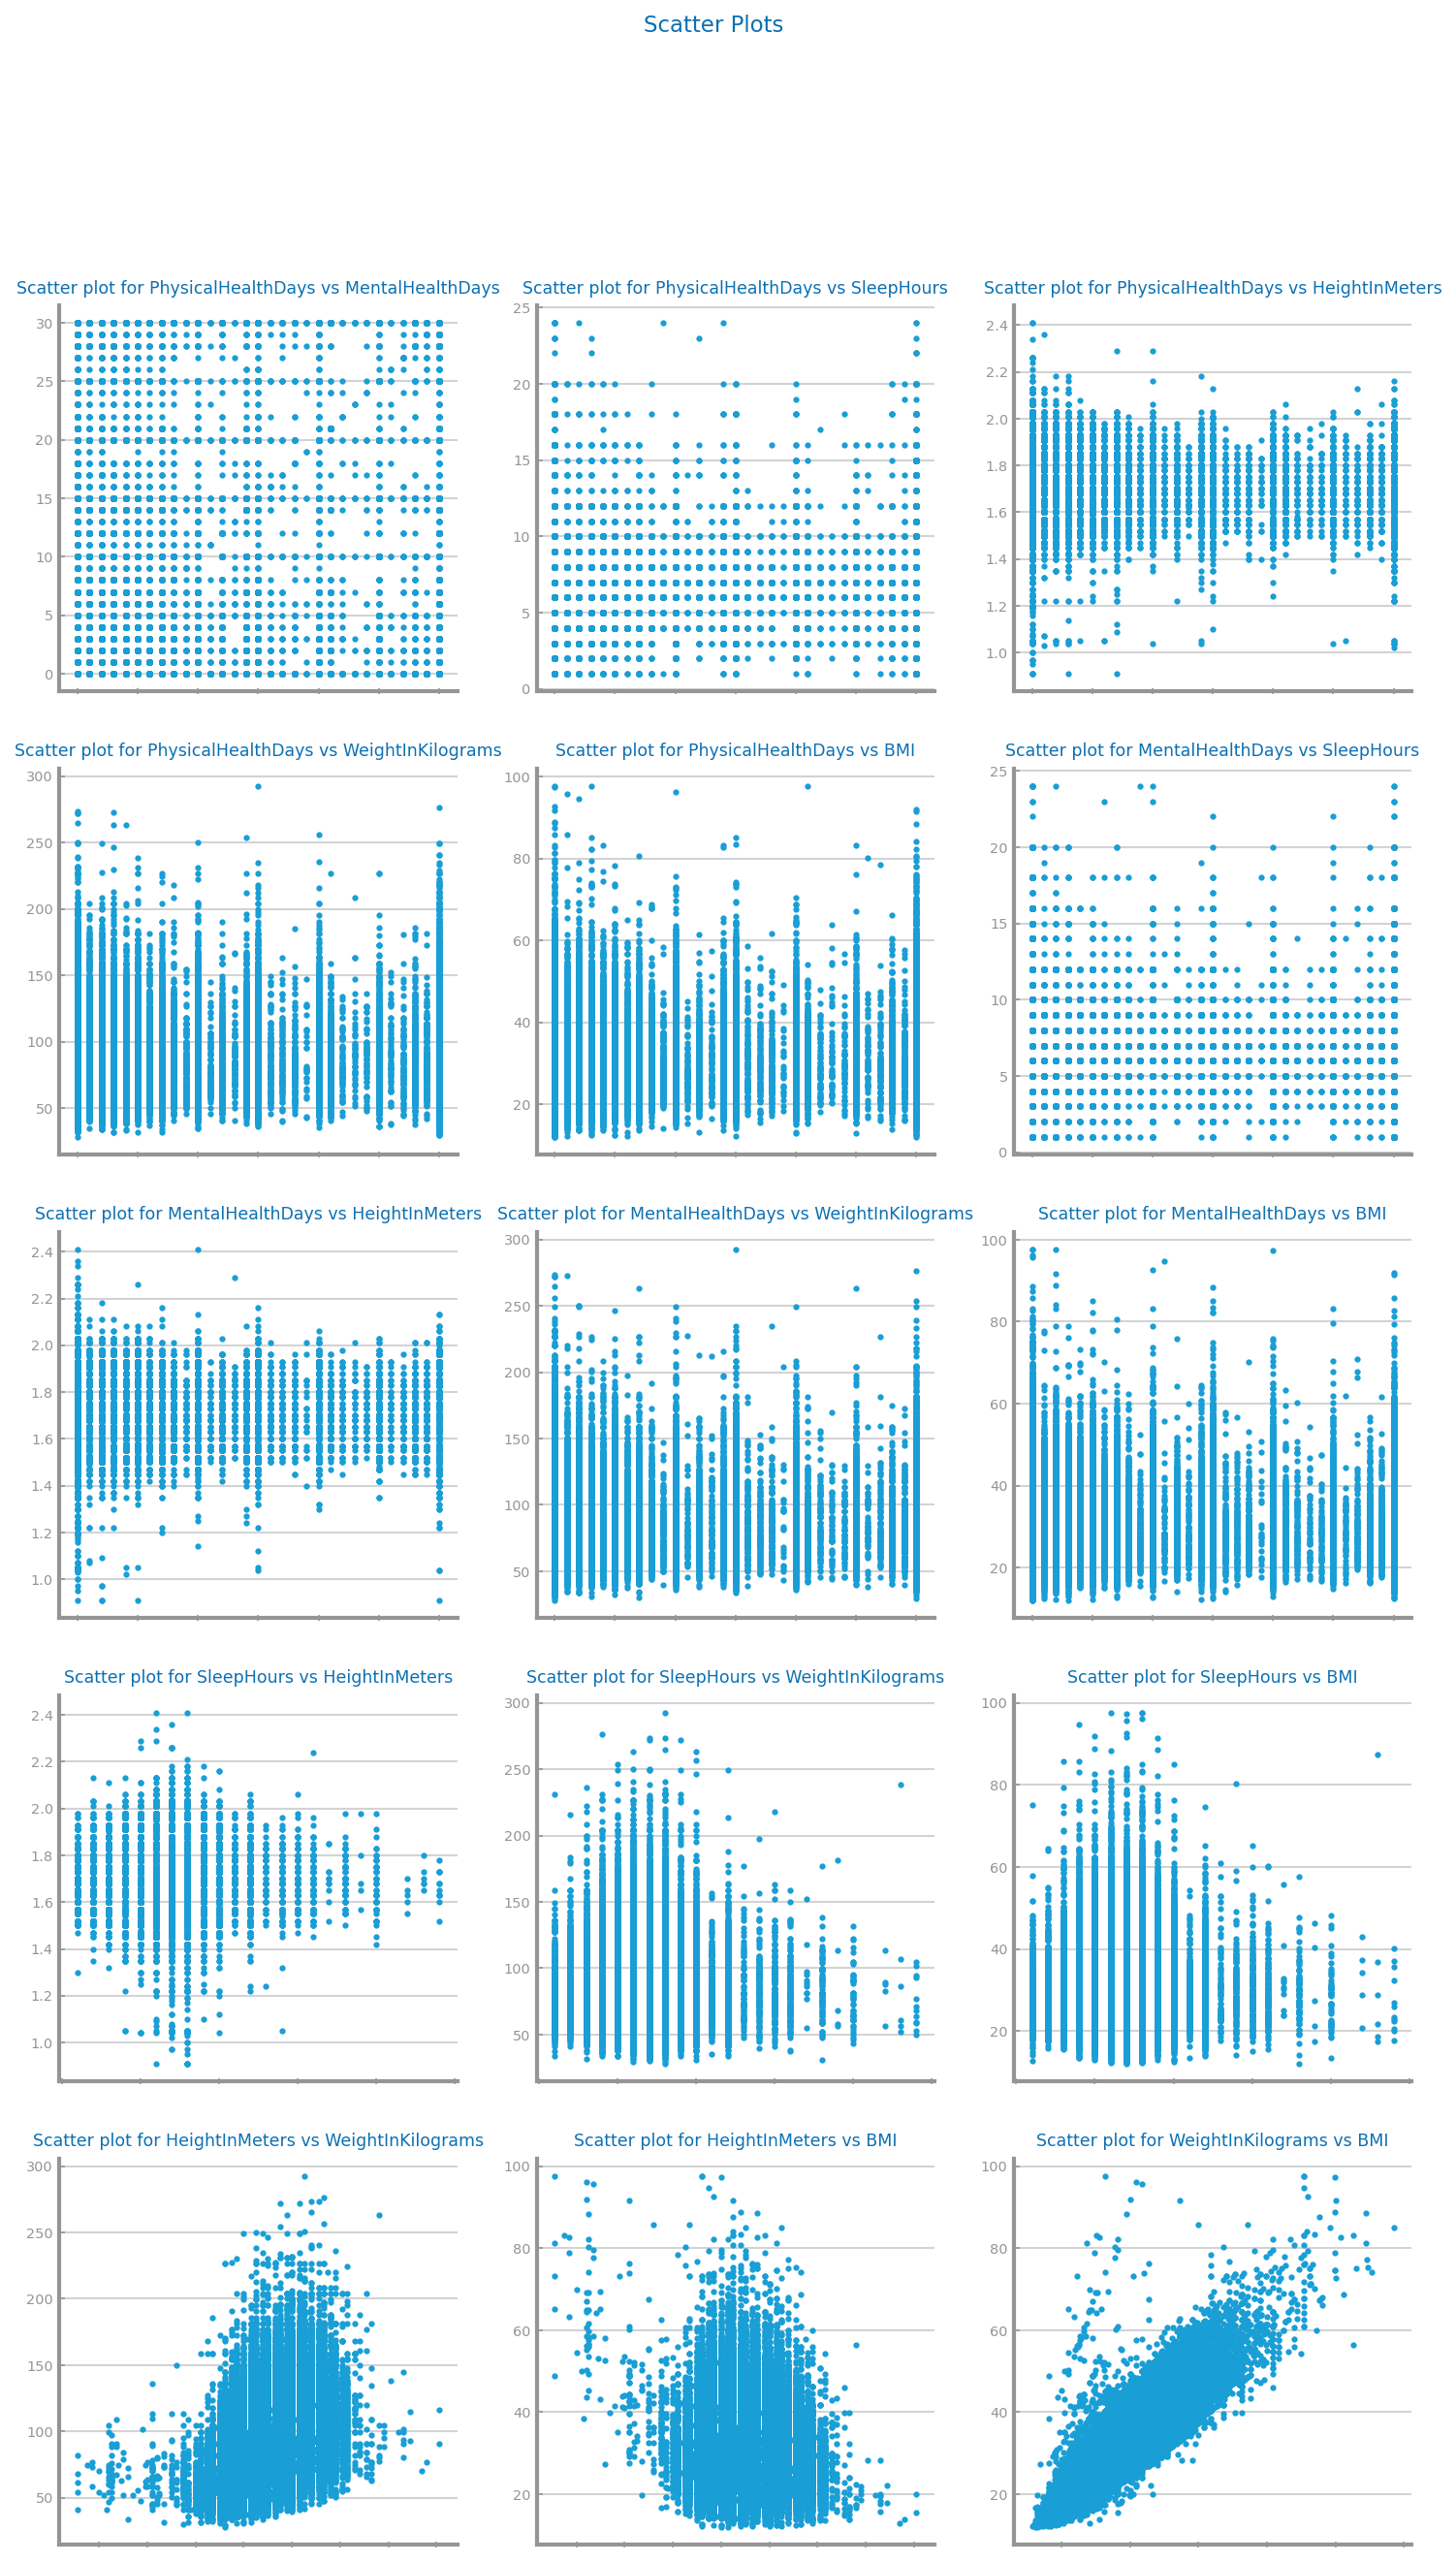

In [85]:
# Scatter plots for numeric variables vs target
data = data.dropna()

numeric: list[str] = variable_types["numeric"]

if [] != numeric:
    rows: int
    cols: int
    rows, cols = 5, 3
    fig: Figure
    axs: ndarray
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    plt.suptitle('Scatter Plots', fontsize=11)

    for n in range(len(numeric)):

        for m in range(len(numeric)):
            if n == m:
                continue

            # dont compare the same variable twice
            if m < n:
                continue

            axs[i, j].set_title("Scatter plot for %s vs %s" % (numeric[n], numeric[m]))
            axs[i, j].scatter(data[numeric[n]].dropna().values, data[numeric[m]].dropna().values)
            axs[i, j].set_xticklabels([numeric[n]])  # Set the label to the variable name
            if j == 2:
                i = i + 1
                j = 0  
            else:   
                j = j + 1

    plt.savefig(f"images/{file_tag}12_scatter_plots.png")
            
    show()

In [86]:
"""#TODO falta o sparsity figure
# target = variables_types["numeric"]
# data = data.dropna(subset=target)
data = data.dropna()

vars: list = data.columns.to_list()
if [] != vars:
    n: int = len(vars) - 1
    fig: Figure
    axs: ndarray
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(data, var1, var2, ax=axs[i, j - 1])
    savefig(f"images/{file_tag}_sparsity_study.png")
    show()
else:
    print("Sparsity class: there are no variables.")"""

'#TODO falta o sparsity figure\n# target = variables_types["numeric"]\n# data = data.dropna(subset=target)\ndata = data.dropna()\n\nvars: list = data.columns.to_list()\nif [] != vars:\n    n: int = len(vars) - 1\n    fig: Figure\n    axs: ndarray\n    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)\n    for i in range(len(vars)):\n        var1: str = vars[i]\n        for j in range(i + 1, len(vars)):\n            var2: str = vars[j]\n            plot_multi_scatters_chart(data, var1, var2, ax=axs[i, j - 1])\n    savefig(f"images/{file_tag}_sparsity_study.png")\n    show()\nelse:\n    print("Sparsity class: there are no variables.")'

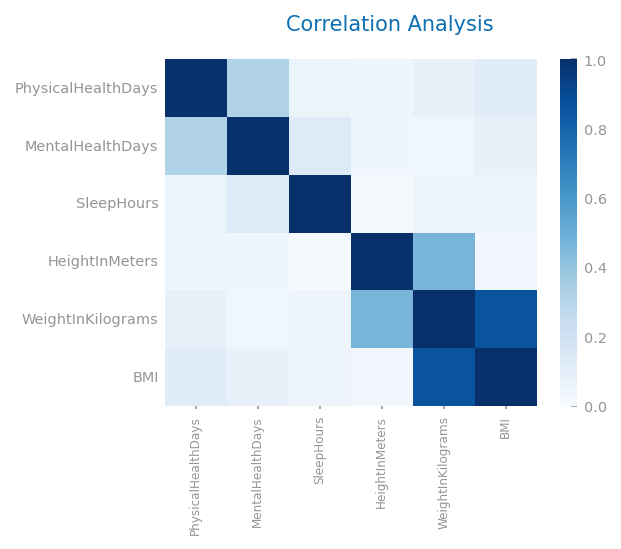

In [ ]:
# Correlation Analysis
variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
corr_mtx: pd.DataFrame = data[numeric].corr().abs()

figure()
plt.suptitle("Correlation Analysis", fontsize=9)
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
plt.savefig(f"images/{file_tag}13_class_correlation.png" ,bbox_inches='tight')
show()